# **线性回归**

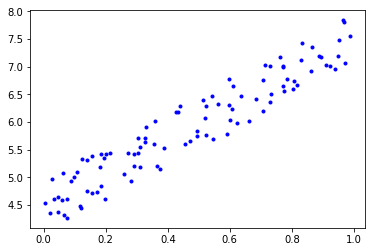

In [2]:
# 数学原理
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.rand(100,1)
y= 4 + 3*x + np.random.rand(100,1)

plt.plot(x,y,'b.')

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [3]:
x_b=np.c_[np.ones((100,1)),x]
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta_best 

array([[4.51359766],
       [2.96646836]])

In [4]:
x_new=np.array([[0],[2]])
x_new_b=np.c_[np.ones((2,1)),x_new]
y_predict=x_new_b.dot(theta_best)
y_predict

array([[ 4.51359766],
       [10.44653437]])

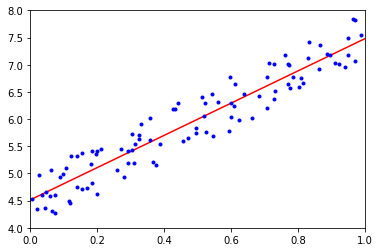

In [5]:
plt.plot(x_new,y_predict,'r-')
plt.plot(x,y,'b.')
plt.axis([0,1,4,8])
plt.show()

In [6]:
# sklear等效代码

from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
lin_reg.intercept_,lin_reg.coef_

(array([4.51359766]), array([[2.96646836]]))

In [8]:
lin_reg.predict(x_new)

array([[ 4.51359766],
       [10.44653437]])

# 梯度下降

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [9]:
# 批量梯度下降
eta=0.1 # 学习率
n_iterations=1000
m=100

theta=np.random.randn(2,1)
theta

array([[-0.68002472],
       [ 0.2322537 ]])

In [10]:
for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta)-y)
    theta = theta - eta * gradients
theta

array([[4.51359768],
       [2.9664683 ]])

In [11]:
# 随机梯度下降
n_epochs=50
t0,t1=5,50

def learning_schedule(t):
    return t0/(t+t1)

theta=np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta-eta*gradients
theta

array([[4.56666648],
       [2.88344543]])

In [11]:
# 等效代码
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
#  >>> y = np.random.randn(n_samples)
#  >>> X = np.random.randn(n_samples, n_features)
sgd_reg.fit(x,y.ravel())

d:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [12]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.52281978]), array([2.9713873]))

![image.png](attachment:image.png)